In [141]:
pwd

'C:\\Users\\hp\\Downloads\\Technical Seminar'

### Apple Stock Price Prediction using LSTM

#### 1 - Loading the Data

In [106]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
df = pd.read_csv('AAPL.csv')

In [19]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600
...,...,...,...,...,...,...,...
10463,2022-06-13,132.869995,135.199997,131.440002,131.880005,131.880005,122207100
10464,2022-06-14,133.130005,133.889999,131.479996,132.759995,132.759995,84784300
10465,2022-06-15,134.289993,137.339996,132.160004,135.429993,135.429993,91533000
10466,2022-06-16,132.080002,132.389999,129.039993,130.059998,130.059998,108123900


In [21]:
# Checking dimension

df.shape

(10468, 7)

#### 2 - Data Preprocessing

In [32]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10468 non-null  object 
 1   Open       10468 non-null  float64
 2   High       10468 non-null  float64
 3   Low        10468 non-null  float64
 4   Close      10468 non-null  float64
 5   Adj Close  10468 non-null  float64
 6   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 572.6+ KB


In [36]:
# converting the 'Date' column into DateTime Datatype
df["Date"] = pd.to_datetime(df['Date'])

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10468 non-null  datetime64[ns]
 1   Open       10468 non-null  float64       
 2   High       10468 non-null  float64       
 3   Low        10468 non-null  float64       
 4   Close      10468 non-null  float64       
 5   Adj Close  10468 non-null  float64       
 6   Volume     10468 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 572.6 KB


In [40]:
# making the 'Date' column as new index

df.set_index('Date', inplace = True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10468 entries, 1980-12-12 to 2022-06-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10468 non-null  float64
 1   High       10468 non-null  float64
 2   Low        10468 non-null  float64
 3   Close      10468 non-null  float64
 4   Adj Close  10468 non-null  float64
 5   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 572.5 KB


In [44]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


In [46]:
# Sorting the Indexes

df.sort_index(inplace = True)

In [50]:
# Data Normalization - Sklearn
scaler = MinMaxScaler()
scaler_values = scaler.fit_transform(df[df.columns])

In [52]:
scaler_values

array([[4.30950014e-04, 4.33270567e-04, 4.42511906e-04, 4.35483696e-04,
        3.40815838e-04, 6.31981003e-02],
       [3.97331936e-04, 3.96658463e-04, 4.05118893e-04, 3.98684579e-04,
        3.12018225e-04, 2.36989104e-02],
       [3.48427437e-04, 3.47836857e-04, 3.55255959e-04, 3.49613594e-04,
        2.73615897e-04, 1.42459064e-02],
       ...,
       [7.35239774e-01, 7.50670228e-01, 7.37757535e-01, 7.44010911e-01,
        7.46069029e-01, 1.23332565e-02],
       [7.23135563e-01, 7.23604845e-01, 7.20334206e-01, 7.14499102e-01,
        7.16477939e-01, 1.45687326e-02],
       [7.12126738e-01, 7.27377614e-01, 7.24634207e-01, 7.22742631e-01,
        7.24743614e-01, 1.80712734e-02]])

In [54]:
# changing from array format to dataframe format
df_scaled = pd.DataFrame(scaler_values, columns = df.columns, index = df.index)

In [56]:
df_scaled.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.000431,0.000433,0.000443,0.000435,0.000341,0.063198
1980-12-15,0.000397,0.000397,0.000405,0.000399,0.000312,0.023699
1980-12-16,0.000348,0.000348,0.000355,0.000350,0.000274,0.014246
1980-12-17,0.000361,0.000363,0.000371,0.000365,0.000286,0.011647
1980-12-18,0.000379,0.000381,0.000390,0.000383,0.000300,0.009897


#### 3 - Plotting the Columns

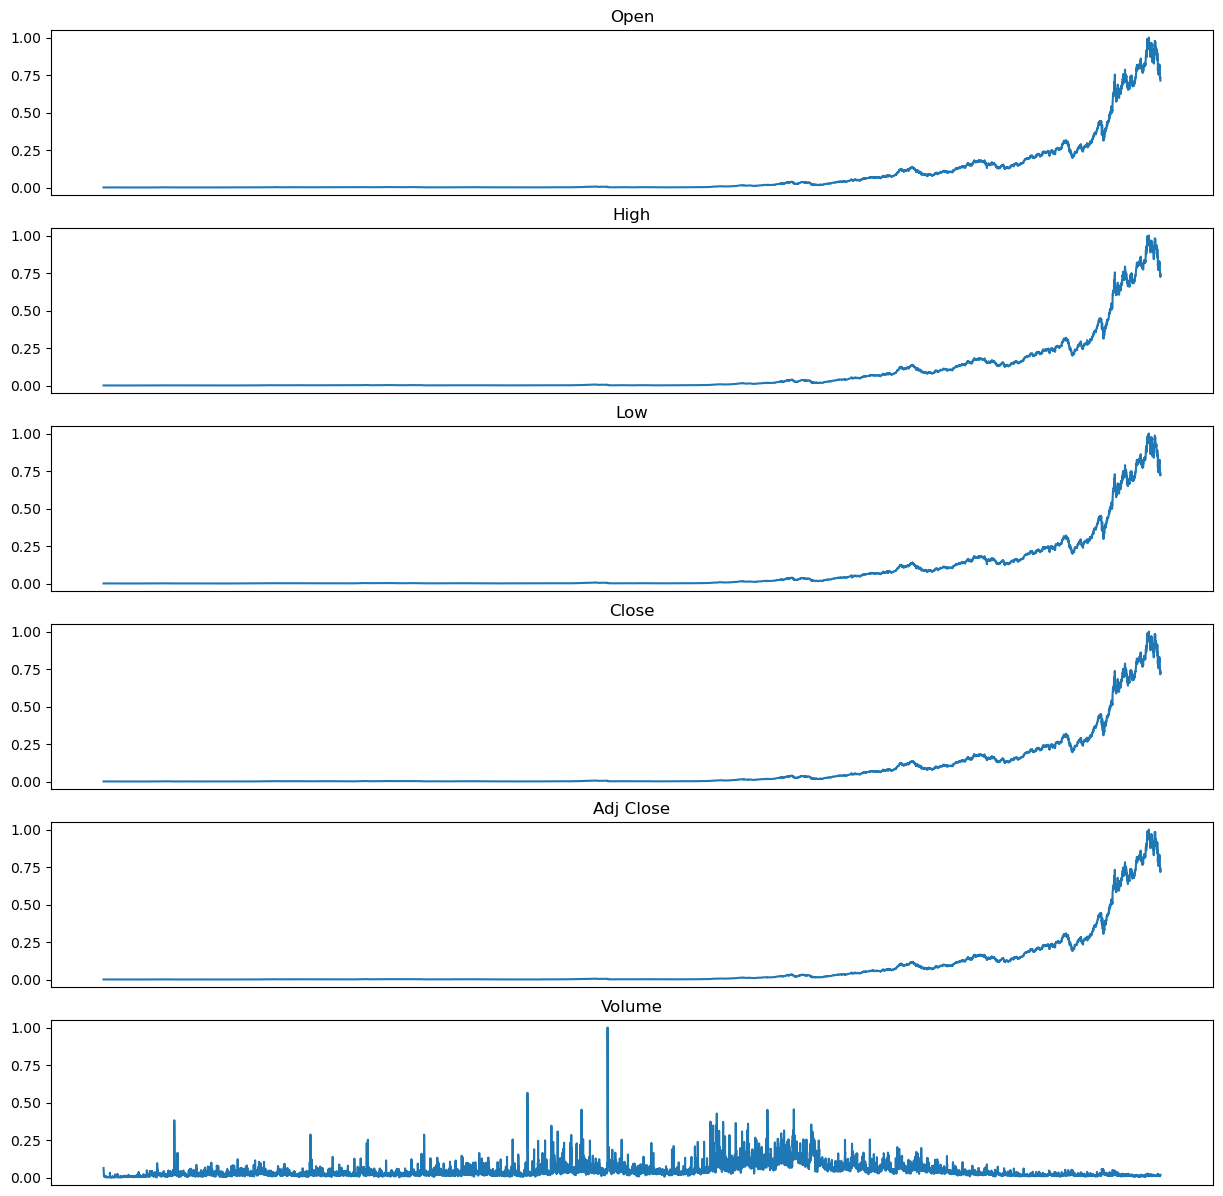

In [63]:
# plotting by importing matplotlib

plt.rcParams['figure.figsize'] = (15,15)
figure, axes = plt.subplots(6)

for ax, col in zip(axes, df_scaled.columns):
    ax.plot(df_scaled[col])
    ax.set_title(col)
    ax.axes.xaxis.set_visible(False)

In [ ]:
# when working with ARIMA models it's mandatory to convert the data into stationary format but for LSTM it's not necessary

#### 4 - Creating the Sliding Window Sequences

In [68]:
def create_sequence(data, window_size):
    X = []
    y = []
    for i in range(window_size, len(data)):
        X.append(data.iloc[i-window_size : i].values)
        y.append(data.iloc[i].values)
    return np.array(X), np.array(y)

In [70]:
window_size = 60

X,y = create_sequence(df_scaled, window_size)

In [72]:
X.shape , y.shape

((10408, 60, 6), (10408, 6))

#### 5 - Train Test Split

In [83]:
# Import sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape

((8326, 60, 6), (2082, 60, 6))

#### 6 - Building LSTM Model

In [94]:
X_train.shape[1], X_train.shape[2]

(60, 6)

In [98]:
y_train.shape[1]

6

In [102]:
# import keras from Tensorflow

model = keras.Sequential([
    # adding the first LSTM layer
    keras.layers.LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])),
    keras.layers.Dropout(0.3),

    # adding the Second LSTM layer
    keras.layers.LSTM(units = 50, return_sequences = True),
    keras.layers.Dropout(0.3),

    # adding the Third LSTM layer
    keras.layers.LSTM(units = 50, return_sequences = False),
    keras.layers.Dropout(0.3),

    # adding Output Layer
    keras.layers.Dense(y_train.shape[1])
])

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [104]:
# Compilation
model.compile(optimizer = "adam",
             loss = "mean_squared_error",
             metrics = ["RootMeanSquaredError"])

In [108]:
# Early Stopping Models
early_stopping = EarlyStopping(monitor = 'val_loss',
                              patience = 10,
                              restore_best_weights = True)

In [114]:
lstm_model = model.fit(X_train, y_train, 
                      validation_split = 0.2,
                      epochs = 100,
                      batch_size = 3,
                      callbacks = [early_stopping])

Epoch 1/100
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 68s 31ms/step - RootMeanSquaredError: 0.0267 - loss: 7.1094e-04 - val_RootMeanSquaredError: 0.0164 - val_loss: 2.6754e-04
Epoch 2/100
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 63s 28ms/step - RootMeanSquaredError: 0.0257 - loss: 6.6174e-04 - val_RootMeanSquaredError: 0.0185 - val_loss: 3.4330e-04
Epoch 3/100
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 65s 29ms/step - RootMeanSquaredError: 0.0261 - loss: 6.8087e-04 - val_RootMeanSquaredError: 0.0234 - val_loss: 5.4778e-04
Epoch 4/100
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 65s 29ms/step - RootMeanSquaredError: 0.0248 - loss: 6.1384e-04 - val_RootMeanSquaredError: 0.0199 - val_loss: 3.9708e-04
Epoch 5/100
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 67s 30ms/step - RootMeanSquaredError: 0.0265 - loss: 7.0127e-04 - val_RootMeanSquaredError: 0.0177 - val_loss: 3.1367e-04
Epoch 6/100
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 60s 27ms/step - RootMeanSquaredError: 0.0258 - loss: 6.6317e-04 - val_RootMeanSquaredError: 0.0165 - val_loss: 2.7107e-04
Epoch 7/10

In [118]:
lstm_model.history

{'RootMeanSquaredError': [0.026663416996598244,
  0.02572430856525898,
  0.026093540713191032,
  0.02477576956152916,
  0.02648150362074375,
  0.025752121582627296,
  0.026680465787649155,
  0.024857638403773308,
  0.02516922727227211,
  0.024624688550829887],
 'loss': [0.0007109378348104656,
  0.0006617400795221329,
  0.0006808728212490678,
  0.0006138387252576649,
  0.0007012700079940259,
  0.0006631718133576214,
  0.0007118472713045776,
  0.0006179021438583732,
  0.0006334900390356779,
  0.0006063752807676792],
 'val_RootMeanSquaredError': [0.016356725245714188,
  0.018528355285525322,
  0.02340468391776085,
  0.019926855340600014,
  0.01771065779030323,
  0.01646423526108265,
  0.03605765849351883,
  0.02237706258893013,
  0.018615636974573135,
  0.016590245068073273],
 'val_loss': [0.00026754249120131135,
  0.0003432999656070024,
  0.0005477792583405972,
  0.0003970795660279691,
  0.00031366737675853074,
  0.00027107103960588574,
  0.001300154603086412,
  0.0005007329164072871,
  

In [116]:
predictions = model.predict(X_test)

66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step


#### 7 - Forecasting The Data

In [121]:
predictions = scaler.inverse_transform(predictions)
y_test_rescaled =scaler.inverse_transform(y_test)

In [123]:
predictions[:10]

array([[-2.44776979e-01, -3.00287992e-01, -2.75403440e-01,
        -3.14278662e-01, -5.54303408e-01,  2.01658880e+08],
       [-3.64857346e-01, -4.19056982e-01, -3.96108240e-01,
        -4.33277816e-01, -7.03400195e-01,  2.68609760e+08],
       [ 5.18513222e+01,  5.24028587e+01,  5.11882477e+01,
         5.17733498e+01,  5.00690231e+01,  1.45825488e+08],
       [ 3.11977959e+01,  3.14965248e+01,  3.07864552e+01,
         3.11131344e+01,  2.98243847e+01,  1.94026320e+08],
       [-4.32141960e-01, -4.74272490e-01, -4.84669924e-01,
        -4.99913871e-01, -8.75076771e-01,  5.16116832e+08],
       [-2.36975737e-02, -7.67933652e-02, -5.77156208e-02,
        -9.16839242e-02, -3.21130127e-01,  1.81259056e+08],
       [-7.51438737e-02, -1.07361451e-01, -1.39583707e-01,
        -1.42113790e-01, -5.63519239e-01,  6.51959040e+08],
       [ 2.17312008e-01,  1.67181730e-01,  1.80563956e-01,
         1.49050251e-01, -8.83502662e-02,  1.92359488e+08],
       [ 1.56559706e-01,  1.04293212e-01,  1.228

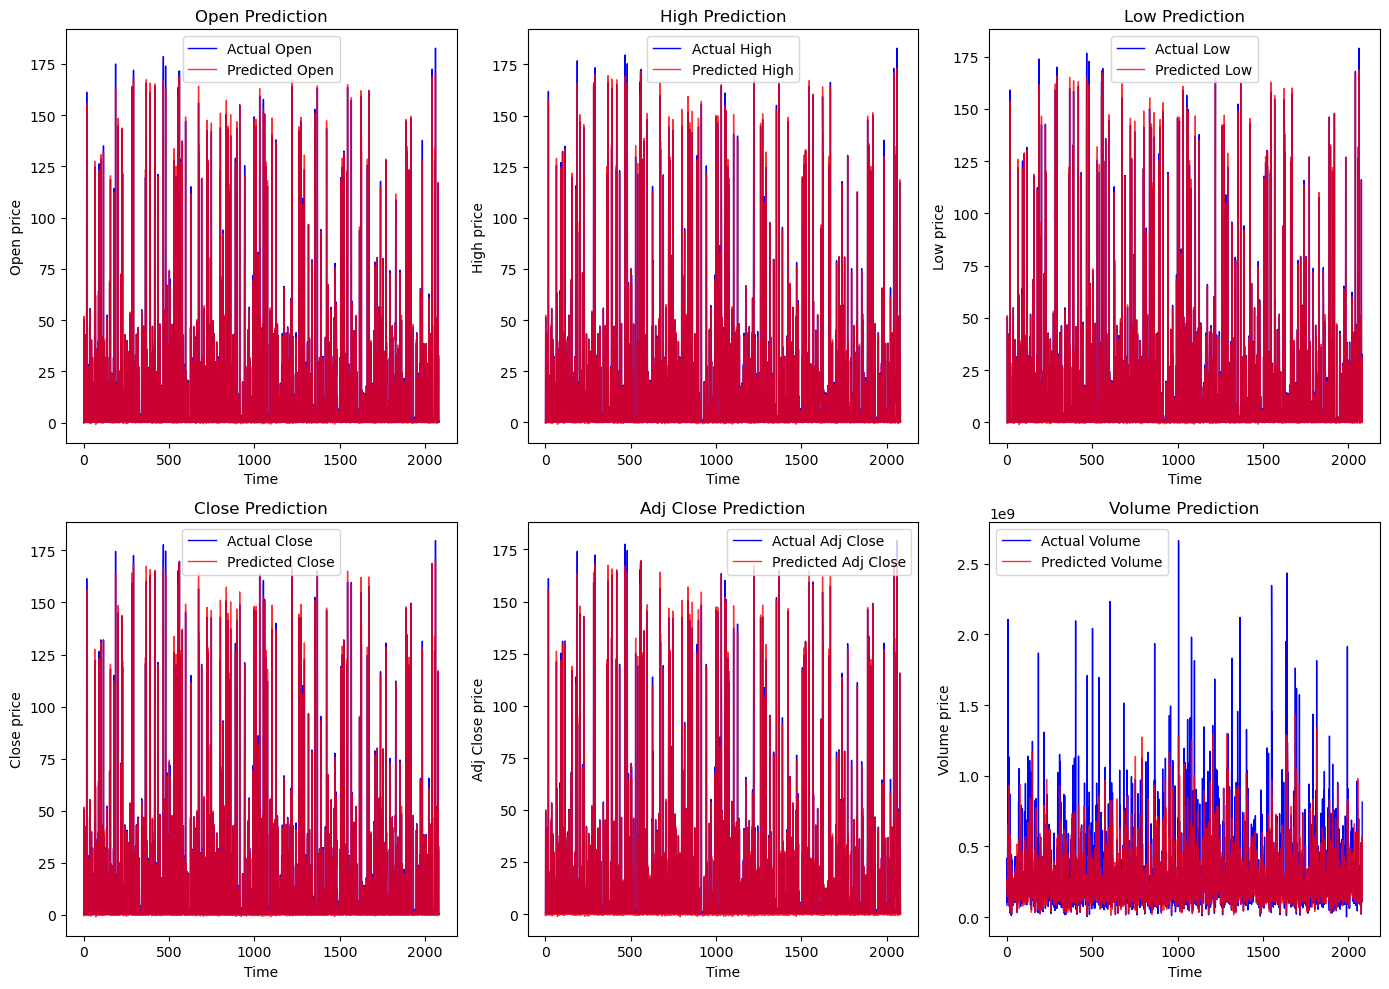

In [139]:
# Plotting the Results
plt.figure(figsize = (14,10))

for i, col in enumerate(df_scaled.columns):
    plt.subplot(2,3,i+1)
    plt.plot(y_test_rescaled [:,i], color = "blue", label = f'Actual {col}' , linewidth = 1)
    plt.plot(predictions [:, i], color = "red" , label = f'Predicted {col}' , linewidth = 1, alpha = 0.8)
    plt.title(f'{col} Prediction')
    plt.xlabel('Time')
    plt.ylabel(f'{col} price')
    plt.legend()
    plt.tight_layout()